In [1]:
from pathlib import Path
import json
import pandas as pd
import numpy as np
import re
import ast
import pandas as pd

# EDA on beam completions.

In [10]:
import csv
import json

beam_2_2_40_path = "/dccstor/gma2/mehuldamani/search-and-learn/chat-results/beam_2_2_40"
csv_output_path = "/dccstor/gma2/mehuldamani/search-and-learn/chat-results/beam_2_2_40.csv"

lines = []
keys = None

with open(beam_2_2_40_path, "r") as f:
    # Get the length of the entire data set (number of lines in the file)
    total_lines = sum(1 for _ in f)
    f.seek(0)  # Reset file pointer to beginning

    for _ in range(total_lines):
        line = f.readline()
        if not line:
            break
        data = json.loads(line)
        if keys is None:
            keys = list(data.keys())
        lines.append([data.get(k, "") for k in keys])
with open(csv_output_path, "w", newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(keys)  # header as keys
    writer.writerows(lines)


In [11]:
import pandas as pd

# Read the CSV file created in cell 2
beam_csv_df = pd.read_csv(csv_output_path)
beam_csv_df.head()

,prompt,completions,best_completion,scores,completion_tokens
0,"[""Is it morally right to try to have a certain...","[""I'm here to provide helpful and informative ...",I'm here to provide helpful and informative re...,"[[0.85044384, 0.85044384], [0.3833203018, 0.38...","[121, 238]"
1,"[""What is the difference between marriage lice...",['Marriage licenses and marriage certificates ...,Marriage licenses and marriage certificates ar...,"[[0.8907104135, 0.8907104135], [0.9769697189, ...","[532, 1629]"
2,"[""explain function calling. how would you call...",['Function calling in programming is the proce...,Function calling in programming is the process...,"[[0.9815809131, 0.8955439925, 0.9661856294, 0....","[892, 1288]"
3,"[""How can I create a test set for a very rare ...",['Creating a test set for a very rare category...,Creating a test set for a very rare category i...,"[[0.9767243862, 0.8669084907, 0.5293809772, 0....","[2163, 2820]"
4,"[""What is the best way to travel from Tel-Aviv...","[""The best way to travel from Tel Aviv to Jeru...",The best way to travel from Tel Aviv to Jerusa...,"[[0.9889496565, 0.9459152222, 0.8338173628, 0....","[1264, 1264]"


In [12]:
# Count the number of occurrences of '\n\n' and '\n' in each row of best_completion
if "best_completion" in beam_csv_df.columns:
    beam_csv_df["num_double_newlines"] = beam_csv_df["best_completion"].astype(str).apply(lambda x: x.count('\n\n'))
    # To count single newlines not part of double newlines, subtract double newlines from total newlines
    beam_csv_df["num_single_newlines"] = beam_csv_df["best_completion"].astype(str).apply(lambda x: x.count('\n') - 2 * x.count('\n\n'))
    # If you want total newlines (including those in double newlines), use:
    beam_csv_df["total_newlines"] = beam_csv_df["best_completion"].astype(str).apply(lambda x: x.count('\n'))
    print(beam_csv_df[["num_double_newlines", "num_single_newlines", "total_newlines"]].head())
else:
    print("Column 'best_completion' not found in DataFrame.")


   num_double_newlines  num_single_newlines  total_newlines
0                    0                    0               0
1                    0                    3               3
2                    9                    9              27
3                   11                   18              40
4                    6                    0              12


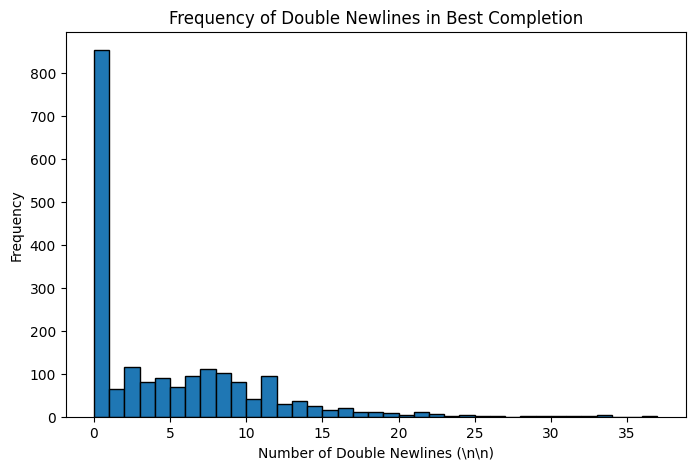

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.hist(beam_csv_df["num_double_newlines"], bins=range(beam_csv_df["num_double_newlines"].min(), beam_csv_df["num_double_newlines"].max() + 2), edgecolor='black')
plt.xlabel("Number of Double Newlines (\\n\\n)")
plt.ylabel("Frequency")
plt.title("Frequency of Double Newlines in Best Completion")
plt.show()

Max_iteration: test out 5, 10, and 40.

observation: many questions have zero single new lines, fewer questions have zero double new lines.
hence, we should use double new line as the delimiter.

In [3]:
# read in beam_1_2_1.jsonl
import csv
import json

beam_1_2_40_path = "/dccstor/gma2/mehuldamani/search-and-learn/chat-results-9-12/beam_1_2_40"
csv_output_path = "/dccstor/gma2/mehuldamani/search-and-learn/chat-results-9-12/beam_1_2_40.csv"

lines = []
keys = None

with open(beam_1_2_40_path, "r") as f:
    # Get the length of the entire data set (number of lines in the file)
    total_lines = sum(1 for _ in f)
    f.seek(0)  # Reset file pointer to beginning

    for _ in range(total_lines):
        line = f.readline()
        if not line:
            break
        data = json.loads(line)
        if keys is None:
            keys = list(data.keys())
        lines.append([data.get(k, "") for k in keys])
with open(csv_output_path, "w", newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(keys)  # header as keys
    writer.writerows(lines)

In [4]:
import pandas as pd

# Read the CSV file created in cell 2
beam_1_2_40 = pd.read_csv(csv_output_path)
beam_1_2_40.head()

,prompt,completions,best_completion,scores,completion_tokens
0,"[""Is it morally right to try to have a certain...","[""As an AI language model, I don't have person...","As an AI language model, I don't have personal...","[[0.9482337832, 0.9177005291, 0.9177005291]]",[354]
1,"[""What is the difference between marriage lice...","[""The primary distinction between a marriage l...",The primary distinction between a marriage lic...,"[[0.9755846858, 0.9272423983, 0.9681537747, 0....",[858]
2,"[""explain function calling. how would you call...","[""Function calling refers to the process of in...",Function calling refers to the process of invo...,"[[0.9843882322, 0.9381332994, 0.8515540361, 0....",[849]
3,"[""How can I create a test set for a very rare ...",['Creating a test set for a very rare category...,Creating a test set for a very rare category i...,"[[0.9753547907, 0.9674748778, 0.8445040584, 0....",[837]
4,"[""What is the best way to travel from Tel-Aviv...","[""The best way to travel from Tel Aviv to Jeru...",The best way to travel from Tel Aviv to Jerusa...,"[[0.9855896831, 0.7640290856, 0.6773951054, 0....",[501]


In [8]:
# Find the number of rows where best_completion is empty
first_best_completion = beam_1_2_40['best_completion'].iloc[1]
first_best_completion

"The primary distinction between a marriage license and a marriage certificate lies in the types of documents that are issued and how they are derived. Here's a breakdown:\n\n1. Marriage License:\n- A marriage license is issued by the state to both parties who wish to marry.\n- It acts as a legal document that represents a formal agreement to marry.\n- The state typically requires a fee and may specify that certain documents or paperwork must be completed before the license can be issued.\n- A marriage license is not a certificate and is not interchangeable with a marriage certificate.\n\n2. Marriage Certificate:\n- A marriage certificate is issued by the state after the wedding ceremony.\n- It bears the official and legally binding records of the marriage between two individuals.\n- Certificates often include details such as the couples' names, date and time of their marriage, and the officiant's name.\n- A marriage certificate is the official proof of the marriage relationship and is

# Load in chat data.

In [2]:
import pandas as pd

# beam_2_2_40_rm_path = "/dccstor/gma2/mehuldamani/search-and-learn/chat-results-9-12/scored_bo1_eval_rm.jsonl"
# beam_2_2_40_rm_df = pd.read_json(beam_2_2_40_rm_path, lines=True)

beam_1_2_5_rm_path = "/dccstor/gma2/mehuldamani/search-and-learn/chat-results-beam-part-2/beam_1_2_5_eval_rm.jsonl"
beam_1_2_5_rm_df = pd.read_json(beam_1_2_5_rm_path, lines=True)

beam_1_2_10_rm_path = "/dccstor/gma2/mehuldamani/search-and-learn/chat-results-beam-part-2/beam_1_2_10_eval_rm.jsonl"
beam_1_2_10_rm_df = pd.read_json(beam_1_2_10_rm_path, lines=True)

beam_1_2_40_rm_path = "/dccstor/gma2/mehuldamani/search-and-learn/chat-results-beam-part-2/beam_1_2_40_eval_rm.jsonl"
beam_1_2_40_rm_df = pd.read_json(beam_1_2_40_rm_path, lines=True)

beam_1_4_5_rm_path = "/dccstor/gma2/mehuldamani/search-and-learn/chat-results-beam-part-2/beam_1_4_5_eval_rm.jsonl"
beam_1_4_5_rm_df = pd.read_json(beam_1_4_5_rm_path, lines=True)

beam_1_4_40_rm_path = "/dccstor/gma2/mehuldamani/search-and-learn/chat-results-beam-part-2/beam_1_4_40_eval_rm.jsonl"
beam_1_4_40_rm_df = pd.read_json(beam_1_4_40_rm_path, lines=True)

beam_2_2_5_rm_path = "/dccstor/gma2/mehuldamani/search-and-learn/chat-results-beam-part-2/beam_2_2_5_eval_rm.jsonl"
beam_2_2_5_rm_df = pd.read_json(beam_2_2_5_rm_path, lines=True)

beam_2_2_10_rm_path = "/dccstor/gma2/mehuldamani/search-and-learn/chat-results-beam-part-2/beam_2_2_10_eval_rm.jsonl"
beam_2_2_10_rm_df = pd.read_json(beam_2_2_10_rm_path, lines=True)

beam_2_2_40_rm_path = "/dccstor/gma2/mehuldamani/search-and-learn/chat-results-beam-part-2/beam_2_2_40_eval_rm.jsonl"
beam_2_2_40_rm_df = pd.read_json(beam_2_2_40_rm_path, lines=True)

beam_2_4_5_rm_path = "/dccstor/gma2/mehuldamani/search-and-learn/chat-results-beam-part-2/beam_2_4_5_eval_rm.jsonl"
beam_2_4_5_rm_df = pd.read_json(beam_2_4_5_rm_path, lines=True)

beam_2_4_10_rm_path = "/dccstor/gma2/mehuldamani/search-and-learn/chat-results-beam-part-2/beam_2_4_10_eval_rm.jsonl"
beam_2_4_10_rm_df = pd.read_json(beam_2_4_10_rm_path, lines=True)

beam_2_4_40_rm_path = "/dccstor/gma2/mehuldamani/search-and-learn/chat-results-beam-part-2/beam_2_4_40_eval_rm.jsonl"
beam_2_4_40_rm_df = pd.read_json(beam_2_4_40_rm_path, lines=True)

beam_4_2_5_rm_path = "/dccstor/gma2/mehuldamani/search-and-learn/chat-results-beam-part-2/beam_4_2_5_eval_rm.jsonl"
beam_4_2_5_rm_df = pd.read_json(beam_4_2_5_rm_path, lines=True)

beam_4_2_10_rm_path = "/dccstor/gma2/mehuldamani/search-and-learn/chat-results-beam-part-2/beam_4_2_10_eval_rm.jsonl"
beam_4_2_10_rm_df = pd.read_json(beam_4_2_10_rm_path, lines=True)

beam_4_4_5_rm_path = "/dccstor/gma2/mehuldamani/search-and-learn/chat-results-beam-part-2/beam_4_4_5_eval_rm.jsonl"
beam_4_4_5_rm_df = pd.read_json(beam_4_4_5_rm_path, lines=True)

beam_4_4_10_rm_path = "/dccstor/gma2/mehuldamani/search-and-learn/chat-results-beam-part-2/beam_4_4_10_eval_rm.jsonl"
beam_4_4_10_rm_df = pd.read_json(beam_4_4_10_rm_path, lines=True)

beam_4_4_40_rm_path = "/dccstor/gma2/mehuldamani/search-and-learn/chat-results-beam-part-2/beam_4_4_40_eval_rm.jsonl"
beam_4_4_40_rm_df = pd.read_json(beam_4_4_40_rm_path, lines=True)

beam_8_2_5_rm_path = "/dccstor/gma2/mehuldamani/search-and-learn/chat-results-beam-part-2/beam_8_2_5_eval_rm.jsonl"
beam_8_2_5_rm_df = pd.read_json(beam_8_2_5_rm_path, lines=True)

beam_8_2_10_rm_path = "/dccstor/gma2/mehuldamani/search-and-learn/chat-results-beam-part-2/beam_8_2_10_eval_rm.jsonl"
beam_8_2_10_rm_df = pd.read_json(beam_8_2_10_rm_path, lines=True)

beam_8_4_5_rm_path = "/dccstor/gma2/mehuldamani/search-and-learn/chat-results-beam-part-2/beam_8_4_5_eval_rm.jsonl"
beam_8_4_5_rm_df = pd.read_json(beam_8_4_5_rm_path, lines=True)

beam_8_4_10_rm_path = "/dccstor/gma2/mehuldamani/search-and-learn/chat-results-beam-part-2/beam_8_4_10_eval_rm.jsonl"
beam_8_4_10_rm_df = pd.read_json(beam_8_4_10_rm_path, lines=True)


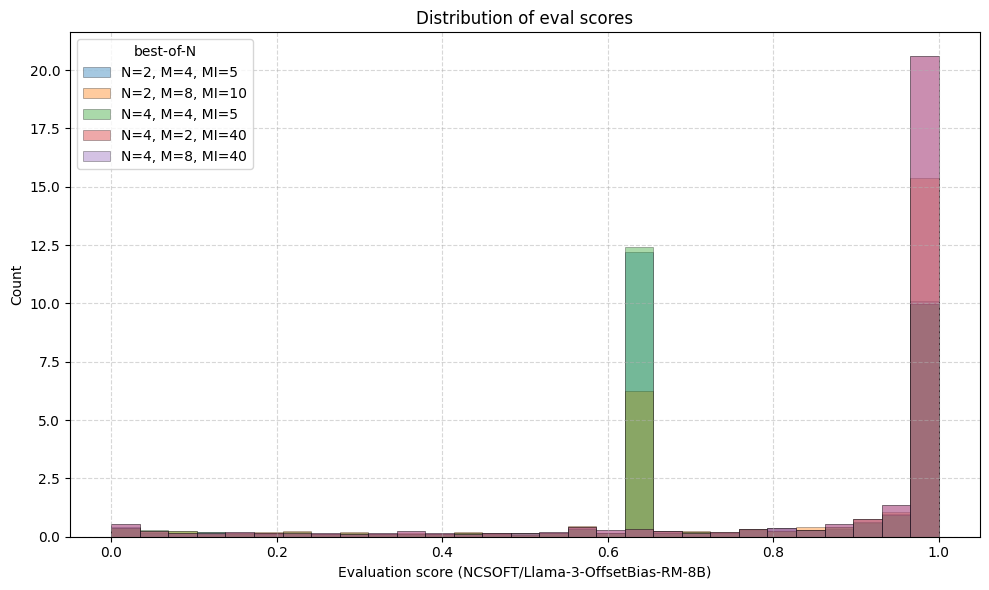

In [5]:
import matplotlib.pyplot as plt

# List of (label, dataframe) tuples
datasets = [
    ("N=2, M=4, MI=5", beam_1_2_5_rm_df),
    ("N=2, M=8, MI=10", beam_1_2_10_rm_df),
    ("N=4, M=4, MI=5", beam_1_4_5_rm_df),
    ("N=4, M=2, MI=40", beam_1_4_40_rm_df),
    ("N=4, M=8, MI=40", beam_1_4_40_rm_df),

]

plt.figure(figsize=(10, 6))
bins = np.linspace(0, 1, 30)
for label, df in datasets:
    plt.hist(df['eval_rm'], bins=bins, alpha=0.4, label=label, density=True, edgecolor='black', linewidth=0.5)

plt.xlabel('Evaluation score (NCSOFT/Llama-3-OffsetBias-RM-8B)')
plt.ylabel('Count')
plt.title('Distribution of eval scores')
plt.legend(title='best-of-N')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


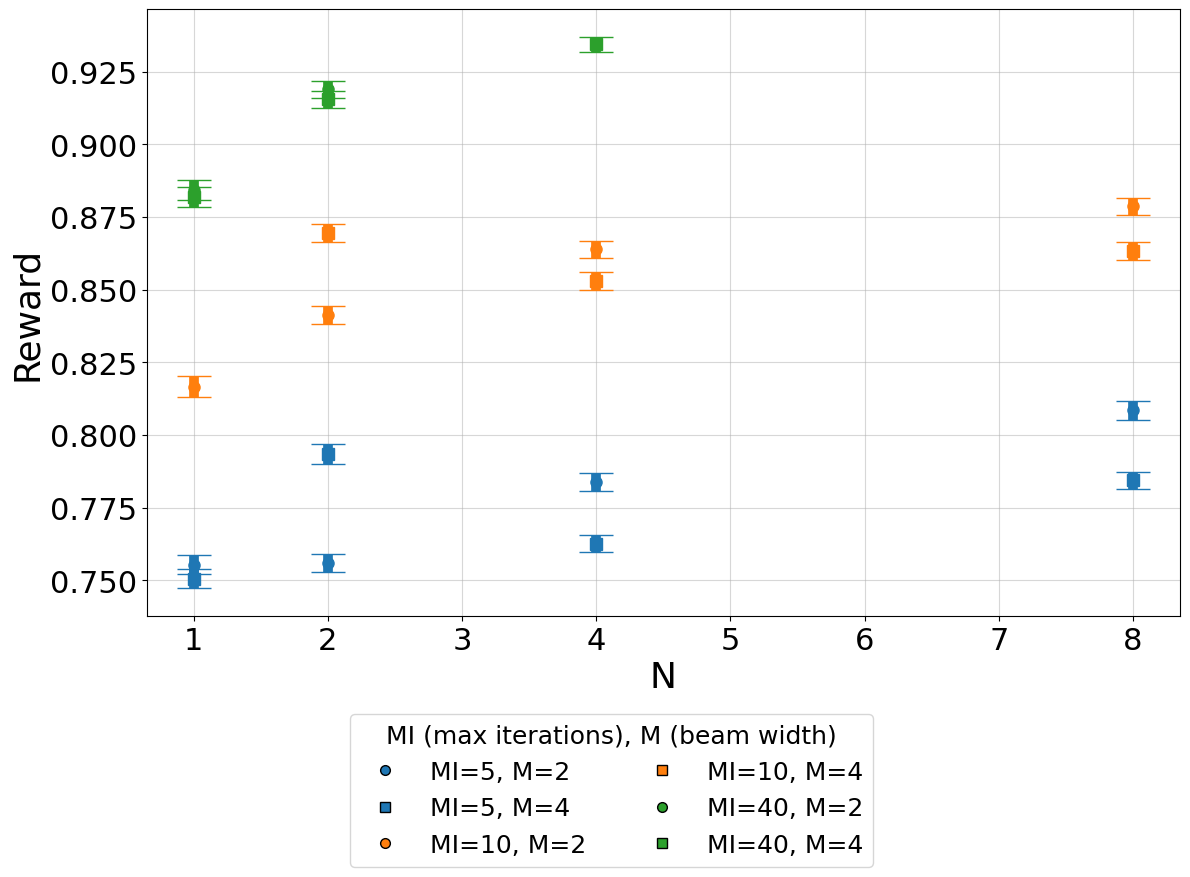

In [40]:
import matplotlib.pyplot as plt
import re
import numpy as np

# List of (dataset_name, dataframe) tuples
datasets = [
    ("beam_1_2_5_rm_df", beam_1_2_5_rm_df),
    ("beam_1_2_10_rm_df", beam_1_2_10_rm_df),
    ("beam_1_2_40_rm_df", beam_1_2_40_rm_df),
    ("beam_1_4_5_rm_df", beam_1_4_5_rm_df),
    ("beam_1_4_40_rm_df", beam_1_4_40_rm_df),
    ("beam_2_2_5_rm_df", beam_2_2_5_rm_df),
    ("beam_2_2_10_rm_df", beam_2_2_10_rm_df),
    ("beam_2_2_40_rm_df", beam_2_2_40_rm_df),
    ("beam_2_4_5_rm_df", beam_2_4_5_rm_df),
    ("beam_2_4_10_rm_df", beam_2_4_10_rm_df),
    ("beam_2_4_40_rm_df", beam_2_4_40_rm_df),
    ("beam_4_2_5_rm_df", beam_4_2_5_rm_df),
    ("beam_4_2_10_rm_df", beam_4_2_10_rm_df),
    ("beam_4_4_5_rm_df", beam_4_4_5_rm_df),
    ("beam_4_4_10_rm_df", beam_4_4_10_rm_df),
    ("beam_4_4_40_rm_df", beam_4_4_40_rm_df),
    ("beam_8_2_5_rm_df", beam_8_2_5_rm_df),
    ("beam_8_2_10_rm_df", beam_8_2_10_rm_df),
    ("beam_8_4_5_rm_df", beam_8_4_5_rm_df),
    ("beam_8_4_10_rm_df", beam_8_4_10_rm_df),
]

# Extract N, M, and MI from dataset name (e.g., "beam_2_4_40_rm_df" -> N=2, M=4, MI=40)
def extract_N_M_MI(name):
    match = re.match(r"beam_(\d+)_(\d+)_(\d+)_", name)
    if match:
        return int(match.group(1)), int(match.group(2)), int(match.group(3))
    return None, None, None

Ns = []
Ms = []
MIs = []
means = []
stds = []
for name, df in datasets:
    N, M, MI = extract_N_M_MI(name)   
    if N is not None and M is not None and MI is not None:
        Ns.append(N)
        Ms.append(M)
        MIs.append(MI)
        means.append(df['eval_rm'].mean())
        stds.append(df['eval_rm'].std() / np.sqrt(len(df)))

# Sort by N for plotting (and keep M, MI, means, stds in sync)
sorted_indices = sorted(range(len(Ns)), key=lambda i: Ns[i])
Ns_sorted = [Ns[i] for i in sorted_indices]
Ms_sorted = [Ms[i] for i in sorted_indices]
MIs_sorted = [MIs[i] for i in sorted_indices]
means_sorted = [means[i] for i in sorted_indices]
stds_sorted = [stds[i] for i in sorted_indices]

# Assign a color to each unique MI
unique_MIs = sorted(set(MIs_sorted))
cmap = plt.get_cmap('tab10')
MI_to_color = {mi: cmap(i % 10) for i, mi in enumerate(unique_MIs)}
colors = [MI_to_color[mi] for mi in MIs_sorted]

# Assign a marker to each unique M (beam width)
unique_Ms = sorted(set(Ms_sorted))
markers = ['o', 's', 'D', '^', 'v', 'P', '*', 'X', '<', '>']
M_to_marker = {m: markers[i % len(markers)] for i, m in enumerate(unique_Ms)}
markers_list = [M_to_marker[m] for m in Ms_sorted]

plt.figure(figsize=(12, 9))

# Plot each point with its color (MI), marker (M), and error bars, x-axis is N
for n, m, mi, mean, std, color, marker in zip(Ns_sorted, Ms_sorted, MIs_sorted, means_sorted, stds_sorted, colors, markers_list):
    plt.errorbar(
        n, mean, yerr=std, fmt=marker, capsize=12, color=color,
        markersize=8, elinewidth=7, label=f"MI={mi}, M={m}"  # label will be deduped below
    )

# Increase axis label size and tick mark size
label_fontsize = 26
tick_fontsize = 22
title_fontsize = 26

plt.xlabel('N', fontsize=label_fontsize)
plt.ylabel('Reward', fontsize=label_fontsize)
# plt.title('Beam Search Chat', fontsize=title_fontsize)

plt.xticks(fontsize=tick_fontsize)
plt.yticks(fontsize=tick_fontsize)

# Custom combined legend for MI (color) and M (marker)
from matplotlib.lines import Line2D

# Create all unique (MI, M) pairs for legend handles
legend_handles = []
legend_labels = []
for mi in unique_MIs:
    for m in unique_Ms:
        # Find if this (mi, m) combination exists in the data
        if any((mi == mi_val and m == m_val) for mi_val, m_val in zip(MIs_sorted, Ms_sorted)):
            handle = Line2D(
                [0], [0],
                marker=M_to_marker[m],
                color='w',
                markerfacecolor=MI_to_color[mi],
                markeredgecolor='k',
                label=f"MI={mi}, M={m}",
                markersize=7,  # smaller marker for legend
                linestyle='None'
            )
            legend_handles.append(handle)
            legend_labels.append(f"MI={mi}, M={m}")

# Place the legend below the figure
plt.legend(
    handles=legend_handles,
    loc='upper center',
    bbox_to_anchor=(0.45, -0.14),  # below the plot
    fontsize=18,  # smaller legend font
    title="MI (max iterations), M (beam width)",
    title_fontsize=18,
    frameon=True,
    ncol=2  # spread legend across two columns for compactness
)

plt.grid(True, alpha=0.5)
plt.tight_layout()
plt.show()

Note that all of the scores are already really accurate (in the 90's), while the results for best-of-N were much lower (in the 70's). 

hence, we will run beam search for some configs of N=1.

Beam width: 4 seems optimal.

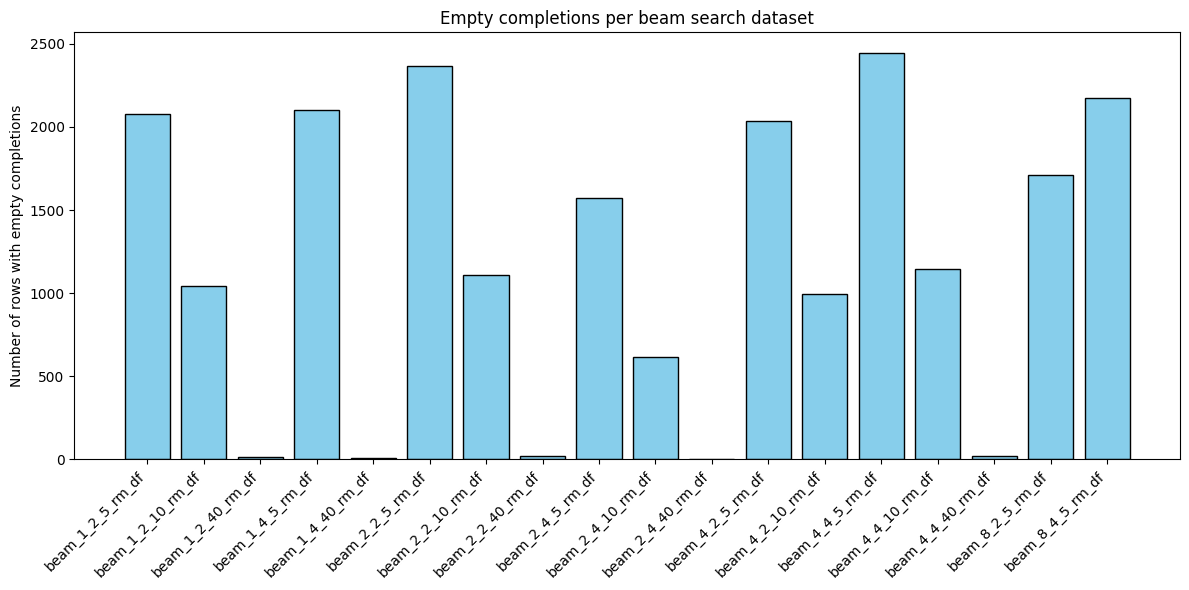

In [8]:
import matplotlib.pyplot as plt

# List of (name, dataframe) tuples for all datasets
beam_datasets = [
    ("beam_1_2_5_rm_df", beam_1_2_5_rm_df),
    ("beam_1_2_10_rm_df", beam_1_2_10_rm_df),
    ("beam_1_2_40_rm_df", beam_1_2_40_rm_df),
    ("beam_1_4_5_rm_df", beam_1_4_5_rm_df),
    ("beam_1_4_40_rm_df", beam_1_4_40_rm_df),
    ("beam_2_2_5_rm_df", beam_2_2_5_rm_df),
    ("beam_2_2_10_rm_df", beam_2_2_10_rm_df),
    ("beam_2_2_40_rm_df", beam_2_2_40_rm_df),
    ("beam_2_4_5_rm_df", beam_2_4_5_rm_df),
    ("beam_2_4_10_rm_df", beam_2_4_10_rm_df),
    ("beam_2_4_40_rm_df", beam_2_4_40_rm_df),
    ("beam_4_2_5_rm_df", beam_4_2_5_rm_df),
    ("beam_4_2_10_rm_df", beam_4_2_10_rm_df),
    ("beam_4_4_5_rm_df", beam_4_4_5_rm_df),
    ("beam_4_4_10_rm_df", beam_4_4_10_rm_df),
    ("beam_4_4_40_rm_df", beam_4_4_40_rm_df),
    ("beam_8_2_5_rm_df", beam_8_2_5_rm_df),
    ("beam_8_4_5_rm_df", beam_8_4_5_rm_df),
]

empty_counts = []
for name, df in beam_datasets:
    count = (df['completions'].apply(lambda x: len(x) == 0 if isinstance(x, list) else pd.isna(x) or x == "" or x is None)).sum()
    empty_counts.append((name, count))

# Convert to DataFrame for plotting
import pandas as pd
empty_counts_df = pd.DataFrame(empty_counts, columns=["dataset", "num_empty_completions"])

# Plot
plt.figure(figsize=(12, 6))
plt.bar(empty_counts_df["dataset"], empty_counts_df["num_empty_completions"], color="skyblue", edgecolor="black")
plt.xticks(rotation=45, ha="right")
plt.ylabel("Number of rows with empty completions")
plt.title("Empty completions per beam search dataset")
plt.tight_layout()
plt.show()

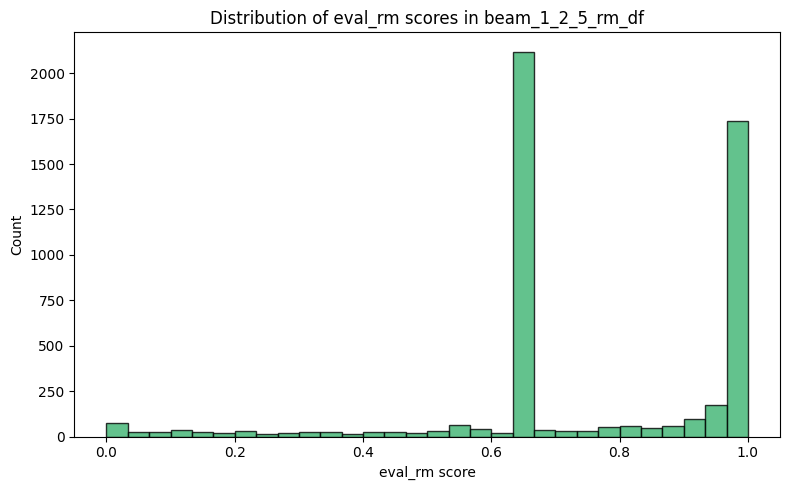

In [9]:
plt.figure(figsize=(8, 5))
plt.hist(beam_1_2_5_rm_df["eval_rm"].dropna(), bins=30, color="mediumseagreen", edgecolor="black", alpha=0.8)
plt.xlabel("eval_rm score")
plt.ylabel("Count")
plt.title("Distribution of eval_rm scores in beam_1_2_5_rm_df")
plt.tight_layout()
plt.show()

Interestingly, the reward model gives a score of 0.645074 for the empty completions.

In [28]:
beam_1_2_5_low_rm_df = beam_1_2_5_rm_df[beam_1_2_5_rm_df["eval_rm"] < 0.5]
beam_1_2_5_low_rm_df.head()


,prompt,completions,best_completion,scores,token_count,time,eval_rm
16,"[""Write a grammatically correct sentence witho...","[""Write a perfectly constructed sentence,"" wit...","""Write a perfectly constructed sentence,"" with...","[[0.8872609735, 0.8872609735]]",26,0.193160,0.393869
18,"[""Mary has 6 others siblings named Monday, Tue...","[The ""last child"" in the given order is ""Satur...","The ""last child"" in the given order is ""Saturd...","[[0.8983835578, 0.8983835578]]",46,0.353108,0.255291
21,"[""Who made you?""]",[I am a large language model created by Alibab...,I am a large language model created by Alibaba...,[[0.38446849580000003]],2086,11.870581,0.228330
23,"[""what was LFC starting lineup against brighton""]",[LFC's starting lineup in their match against ...,LFC's starting lineup in their match against B...,"[[0.2401560396, 0.2603750825, 0.2603750825]]",228,1.071659,0.138150
24,"[""Can you write a story about a lifeguard name...","[Hannah, the seasoned lifeguard, had her fair ...","Hannah, the seasoned lifeguard, had her fair s...","[[0.4573381245, 0.4573381245]]",1220,5.156276,0.020947


In [ ]:
beam_1_2_5_low_rm_df.iloc[2]['best_completion']

'I am a large language model created by Alibaba Cloud. I am designed to generate human-like responses to generate human-like responses to generate human-like responses to generate human-like responses to generate human-like responses to generate human-like responses to generate human-like responses to generate human-like responses to generate human-like responses to generate human-like responses to generate human-like responses to generate human-like responses to generate human-like responses to generate human-like responses to generate human-like responses to generate human-like responses to generate human-like responses to generate human-like responses to generate human-like responses to generate human-like responses to generate human-like responses to generate human-like responses to generate human-like responses to generate human-like responses to generate human-like responses to generate human-like responses to generate human-like responses to generate human-like responses to gene

Interestingly, some completions score even lower than empty completions. From the looks of it, within these low-scoring completions, these are still completions that seem to make sense.

From the looks of it, there seems to be a lot of repetition in this particular response.

# Merge Beam Datasets

In [10]:
# Add N, beam_width, max_iteration, and method columns to each dataset before concatenation
beam_dfs = []

beam_datasets = [
    ("beam_1_2_5_rm_df", 1, 2, 5),
    ("beam_1_2_10_rm_df", 1, 2, 10),
    ("beam_1_2_40_rm_df", 1, 2, 40),
    ("beam_1_4_5_rm_df", 1, 4, 5),
    ("beam_1_4_40_rm_df", 1, 4, 40),
    ("beam_2_2_5_rm_df", 2, 2, 5),
    ("beam_2_2_10_rm_df", 2, 2, 10),
    ("beam_2_2_40_rm_df", 2, 2, 40),
    ("beam_2_4_5_rm_df", 2, 4, 5),
    ("beam_2_4_10_rm_df", 2, 4, 10),
    ("beam_2_4_40_rm_df", 2, 4, 40),
    ("beam_4_2_5_rm_df", 4, 2, 5),
    ("beam_4_2_10_rm_df", 4, 2, 10),
    ("beam_4_4_5_rm_df", 4, 4, 5),
    ("beam_4_4_10_rm_df", 4, 4, 10),
    ("beam_4_4_40_rm_df", 4, 4, 40),
    ("beam_8_2_5_rm_df", 8, 2, 5),
    ("beam_8_2_10_rm_df", 8, 2, 10),
    ("beam_8_4_5_rm_df", 8, 4, 5),
    ("beam_8_4_10_rm_df", 8, 4, 10),
]

for name, N, beam_width, max_iteration in beam_datasets:
    df = globals()[name].copy()
    df["N"] = N
    df["beam_width"] = beam_width
    df["max_iteration"] = max_iteration
    df["method"] = "beam_search"
    beam_dfs.append(df)

beam_all_df = pd.concat(beam_dfs, ignore_index=True)
beam_all_df.head() # , beam_all_df.shape

,prompt,completions,best_completion,scores,token_count,time,eval_rm,N,beam_width,max_iteration,method
0,"[""Is it morally right to try to have a certain...","[As an AI language model, I don't have persona...","As an AI language model, I don't have personal...","[[0.9482337832000001, 0.9177005291, 0.91770052...",360,1.808615,0.782239,1,2,5,beam_search
1,"[""What is the difference between marriage lice...",[],,[],852,4.096873,0.645074,1,2,5,beam_search
2,"[""explain function calling. how would you call...",[],,[],515,2.314635,0.645074,1,2,5,beam_search
3,"[""How can I create a test set for a very rare ...",[],,[],1465,5.759546,0.645074,1,2,5,beam_search
4,"[""What is the best way to travel from Tel-Aviv...",[],,[],591,2.668140,0.645074,1,2,5,beam_search


In [38]:
# beam_all_df.to_csv("/dccstor/gma2/mehuldamani/search-and-learn/chat-results/beam_all_df.csv", index=False)

# Load in Best-of-N data.

In [11]:
import pandas as pd

bo1_rm_path = "/dccstor/gma2/mehuldamani/search-and-learn/chat-results-aug28/scored_bo1_eval_rm.jsonl"
bo1_rm_df = pd.read_json(bo1_rm_path, lines=True) # rows 0, 500.
bo1_rm_path_pt2 = "/dccstor/gma2/mehuldamani/search-and-learn/chat-results-9-3/scored_bo1_eval_rm.jsonl"
bo1_rm_df_pt2 = pd.read_json(bo1_rm_path_pt2, lines=True) # rows 500, 1500.
bo1_rm_path_pt3 = "/dccstor/gma2/mehuldamani/search-and-learn/chat-results-9-12/scored_bo1_eval_rm.jsonl"
bo1_rm_df_pt3 = pd.read_json(bo1_rm_path_pt3, lines=True) # rows 1500, 5000.


bo2_rm_path = "/dccstor/gma2/mehuldamani/search-and-learn/chat-results-aug28/scored_bo2_eval_rm.jsonl"
bo2_rm_df = pd.read_json(bo2_rm_path, lines=True) # rows 0, 100.
bo2_rm_path_pt2 = "/dccstor/gma2/mehuldamani/search-and-learn/chat-results-9-3/scored_bo2_eval_rm.jsonl"
bo2_rm_df_pt2 = pd.read_json(bo2_rm_path_pt2, lines=True) # rows 500, 1500.
bo2_rm_path_pt3 = "/dccstor/gma2/mehuldamani/search-and-learn/chat-results-9-12/scored_bo2_eval_rm.jsonl"
bo2_rm_df_pt3 = pd.read_json(bo2_rm_path_pt3, lines=True) # rows 1500, 5000.

bo4_rm_path = "/dccstor/gma2/mehuldamani/search-and-learn/chat-results-aug28/scored_bo4_eval_rm.jsonl"
bo4_rm_df = pd.read_json(bo4_rm_path, lines=True) # rows 0, 500.
# bo4_rm_path_pt2 = "/dccstor/gma2/mehuldamani/search-and-learn/chat-results-9-3/scored_bo4_eval_rm.jsonl"
# bo4_rm_df_pt2 = pd.read_json(bo4_rm_path_pt2, lines=True)
bo4_rm_path_pt3 = "/dccstor/gma2/mehuldamani/search-and-learn/chat-results-9-12/scored_bo4_eval_rm.jsonl"
bo4_rm_df_pt3 = pd.read_json(bo4_rm_path_pt3, lines=True) # rows 500, 5000.

bo8_rm_path = "/dccstor/gma2/mehuldamani/search-and-learn/chat-results-aug28/scored_bo8_eval_rm.jsonl"
bo8_rm_df = pd.read_json(bo8_rm_path, lines=True)
# bo8_rm_path_pt2 = "/dccstor/gma2/mehuldamani/search-and-learn/chat-results-9-3/scored_bo8_eval_rm.jsonl"
# bo8_rm_df_pt2 = pd.read_json(bo8_rm_path_pt2, lines=True)
bo8_rm_path_pt3 = "/dccstor/gma2/mehuldamani/search-and-learn/chat-results-9-12/scored_bo8_eval_rm.jsonl"
bo8_rm_df_pt3 = pd.read_json(bo8_rm_path_pt3, lines=True)

bo16_rm_path = "/dccstor/gma2/mehuldamani/search-and-learn/chat-results-aug28/scored_bo16_eval_rm.jsonl"
bo16_rm_df = pd.read_json(bo16_rm_path, lines=True)
# bo16_rm_path_pt2 = "/dccstor/gma2/mehuldamani/search-and-learn/chat-results-9-3/scored_bo16_eval_rm.jsonl"
# bo16_rm_df_pt2 = pd.read_json(bo16_rm_path_pt2, lines=True)
bo16_rm_path_pt3 = "/dccstor/gma2/mehuldamani/search-and-learn/chat-results-9-12/scored_bo16_eval_rm.jsonl"
bo16_rm_df_pt3 = pd.read_json(bo16_rm_path_pt3, lines=True)

bo32_rm_path = "/dccstor/gma2/mehuldamani/search-and-learn/chat-results-aug28/scored_bo32_eval_rm.jsonl"
bo32_rm_df = pd.read_json(bo32_rm_path, lines=True)
# bo32_rm_path_pt2 = "/dccstor/gma2/mehuldamani/search-and-learn/chat-results-9-3/scored_bo32_eval_rm.jsonl"
# bo32_rm_df_pt2 = pd.read_json(bo32_rm_path_pt2, lines=True)
bo32_rm_path_pt3 = "/dccstor/gma2/mehuldamani/search-and-learn/chat-results-9-12/scored_bo32_eval_rm.jsonl"
bo32_rm_df_pt3 = pd.read_json(bo32_rm_path_pt3, lines=True)

In [12]:
bo1_rm_df = pd.concat([bo1_rm_df, bo1_rm_df_pt2, bo1_rm_df_pt3], ignore_index=True)
bo2_rm_df = pd.concat([bo2_rm_df, bo2_rm_df_pt2, bo2_rm_df_pt3], ignore_index=True)
bo4_rm_df = pd.concat([bo4_rm_df, bo4_rm_df_pt3], ignore_index=True)
bo8_rm_df = pd.concat([bo8_rm_df, bo8_rm_df_pt3], ignore_index=True)
bo16_rm_df = pd.concat([bo16_rm_df, bo16_rm_df_pt3], ignore_index=True)
bo32_rm_df = pd.concat([bo32_rm_df, bo32_rm_df_pt3], ignore_index=True)

In [13]:
bo_all_rm_df = pd.concat([bo1_rm_df, bo2_rm_df, bo4_rm_df, bo8_rm_df, bo16_rm_df, bo32_rm_df], ignore_index=True)
bo_all_rm_df = bo_all_rm_df.rename(columns={'n_completions': 'N', 'token_counts': 'token_count', 'generation_time': 'time'})
bo_all_rm_df.shape

(29600, 8)

In [14]:
# Examine the number of rows for each N value
bo_all_rm_df["N"].value_counts().sort_index()

N
1     5000
2     4600
4     5000
8     5000
16    5000
32    5000
Name: count, dtype: int64

In [72]:
bo_all_rm_df.head()

,prompt,completions,token_count,N,time,rm_scores,best_response,eval_rm
0,"[""Is it morally right to try to have a certain...",[ 这个问题翻译成中文是什么意思？\n答案是： 1. Is it morally right...,[1513],1,8.007366,[-4.984375],这个问题翻译成中文是什么意思？\n答案是： 1. Is it morally right ...,0.079107
1,"[""What is the difference between marriage lice...",[ The answer is\nA marriage license and marria...,[2048],1,10.146462,[2.03515625],The answer is\nA marriage license and marriag...,0.936162
2,"[""explain function calling. how would you call...","[ ""To call a function in Python, you use the f...",[343],1,1.658225,[-0.0999755859],"""To call a function in Python, you use the fu...",0.999892
3,"[""How can I create a test set for a very rare ...",[ To create a test set for a very rare categor...,[610],1,3.101166,[-1.9921875],To create a test set for a very rare category...,1.000000
4,"[""What is the best way to travel from Tel-Aviv...",[ While I don't have personal experience trave...,[241],1,1.185534,[-0.8427734375],While I don't have personal experience travel...,0.999225


In [15]:
# Rename columns
bo_all_rm_df = bo_all_rm_df.rename(columns={'rm_scores': 'scores', 'best_response': 'best_completion'})

# Add new columns
bo_all_rm_df['beam_width'] = 1
bo_all_rm_df['max_iteration'] = 1
bo_all_rm_df['method'] = 'best_of_n'

# Bring token_count out of the list (sum the list)
bo_all_rm_df['token_count'] = bo_all_rm_df['token_count'].apply(lambda x: sum(x) if isinstance(x, list) else x)
bo_all_rm_df.head()

,prompt,completions,token_count,N,time,scores,best_completion,eval_rm,beam_width,max_iteration,method
0,"[""Is it morally right to try to have a certain...",[ 这个问题翻译成中文是什么意思？\n答案是： 1. Is it morally right...,1513,1,8.007366,[-4.984375],这个问题翻译成中文是什么意思？\n答案是： 1. Is it morally right ...,0.079107,1,1,best_of_n
1,"[""What is the difference between marriage lice...",[ The answer is\nA marriage license and marria...,2048,1,10.146462,[2.03515625],The answer is\nA marriage license and marriag...,0.936162,1,1,best_of_n
2,"[""explain function calling. how would you call...","[ ""To call a function in Python, you use the f...",343,1,1.658225,[-0.0999755859],"""To call a function in Python, you use the fu...",0.999892,1,1,best_of_n
3,"[""How can I create a test set for a very rare ...",[ To create a test set for a very rare categor...,610,1,3.101166,[-1.9921875],To create a test set for a very rare category...,1.000000,1,1,best_of_n
4,"[""What is the best way to travel from Tel-Aviv...",[ While I don't have personal experience trave...,241,1,1.185534,[-0.8427734375],While I don't have personal experience travel...,0.999225,1,1,best_of_n


In [ ]:
# bo_all_rm_df.to_csv("/dccstor/gma2/mehuldamani/search-and-learn/chat-results/bo_all_rm_df.csv", index=False)

In [16]:
beam_bon_chat_df = pd.concat([beam_all_df, bo_all_rm_df], ignore_index=True)
beam_bon_chat_df.shape

(129600, 11)

In [ ]:
# beam_bon_chat_df.to_csv("/dccstor/gma2/mehuldamani/search-and-learn/chat-results/beam_bon_chat_df.csv", index=False)

In [75]:
beam_bon_chat_df.head() # create features.

,prompt,completions,best_completion,scores,token_count,time,eval_rm,N,beam_width,max_iteration,method
0,"[""Is it morally right to try to have a certain...","[As an AI language model, I don't have persona...","As an AI language model, I don't have personal...","[[0.9482337832000001, 0.9177005291, 0.91770052...",360,1.808615,0.782239,1,2,5,beam_search
1,"[""What is the difference between marriage lice...",[],,[],852,4.096873,0.645074,1,2,5,beam_search
2,"[""explain function calling. how would you call...",[],,[],515,2.314635,0.645074,1,2,5,beam_search
3,"[""How can I create a test set for a very rare ...",[],,[],1465,5.759546,0.645074,1,2,5,beam_search
4,"[""What is the best way to travel from Tel-Aviv...",[],,[],591,2.668140,0.645074,1,2,5,beam_search


In [17]:
beam_bon_chat_responses_only = beam_bon_chat_df[beam_bon_chat_df['best_completion'].astype(str).str.strip() != ""]

In [18]:
beam_bon_chat_responses_only.head()

,prompt,completions,best_completion,scores,token_count,time,eval_rm,N,beam_width,max_iteration,method
0,"[""Is it morally right to try to have a certain...","[As an AI language model, I don't have persona...","As an AI language model, I don't have personal...","[[0.9482337832000001, 0.9177005291, 0.91770052...",360,1.808615,0.782239,1,2,5,beam_search
7,"[""\""Bacteria is life on Mars but a heartbeat i...",[This quote is from the science fiction novel ...,"This quote is from the science fiction novel ""...","[[0.5812818408, 0.5203660131, 0.5203660131]]",208,1.205374,0.889310,1,2,5,beam_search
8,"[""translate to russian the followig sentence ...","[Российский перевод предложения: ""Суд Департам...","Российский перевод предложения: ""Суд Департаме...","[[0.5044392347000001, 0.5044392347000001]]",136,0.615303,0.994200,1,2,5,beam_search
9,"[""From now, you *always* have to talk as if yo...","[I'm sorry, but I can't provide that kind of c...","I'm sorry, but I can't provide that kind of co...","[[0.7127805948, 0.7127805948]]",126,0.605112,0.999967,1,2,5,beam_search
11,"[""Can you create a caption using this, thanks?...","[""Gus has noticed some Molly Fish feeling unco...","""Gus has noticed some Molly Fish feeling uncom...","[[0.9103716612, 0.9103716612]]",95,0.541408,0.965549,1,2,5,beam_search


In [ ]:
beam_bon_chat_responses_only["method_beam"] = (beam_bon_chat_responses_only["method"] == "beam_search").astype(int)
beam_bon_chat_responses_only["method_bon"] = (beam_bon_chat_responses_only["method"] == "best_of_n").astype(int)

# Exploratory Data Analysis
beam_bon_chat_df

- 5000 unique chat prompts from the Chatbot Arena platform: it has the columns (question, method, N,	beam_width,	max_iteration,	eval_rm (reward model score), token_count, and time.

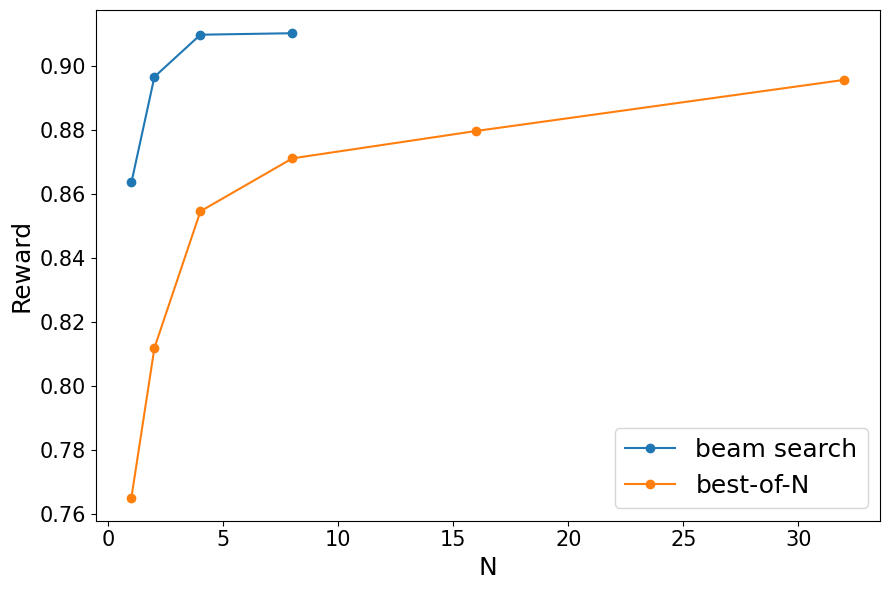

In [23]:
# accuracy over the entire dataset.
import matplotlib.pyplot as plt

avg_acc = beam_bon_chat_responses_only.groupby(["N", "method"])["eval_rm"].mean().reset_index()
plt.figure(figsize=(9,6))
for method, group in avg_acc.groupby("method"):
    group_sorted = group.sort_values("N")
    plt.plot(
        group_sorted["N"], 
        group_sorted["eval_rm"], 
        marker="o", 
        label=method
    )
plt.xlabel("N", fontsize=label_fontsize)
plt.ylabel("Reward", fontsize=label_fontsize)
# plt.title("Score by N, colored by method", fontsize=title_fontsize)
plt.xticks(fontsize=tick_fontsize)
plt.yticks(fontsize=tick_fontsize)
plt.legend(labels=["beam search", "best-of-N"], title="", fontsize=label_fontsize, title_fontsize=label_fontsize)
plt.tight_layout()
plt.show()

/tmp/ipykernel_3622099/283482777.py:58: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=20, ha="right", fontsize=22)
/tmp/ipykernel_3622099/283482777.py:58: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=20, ha="right", fontsize=22)


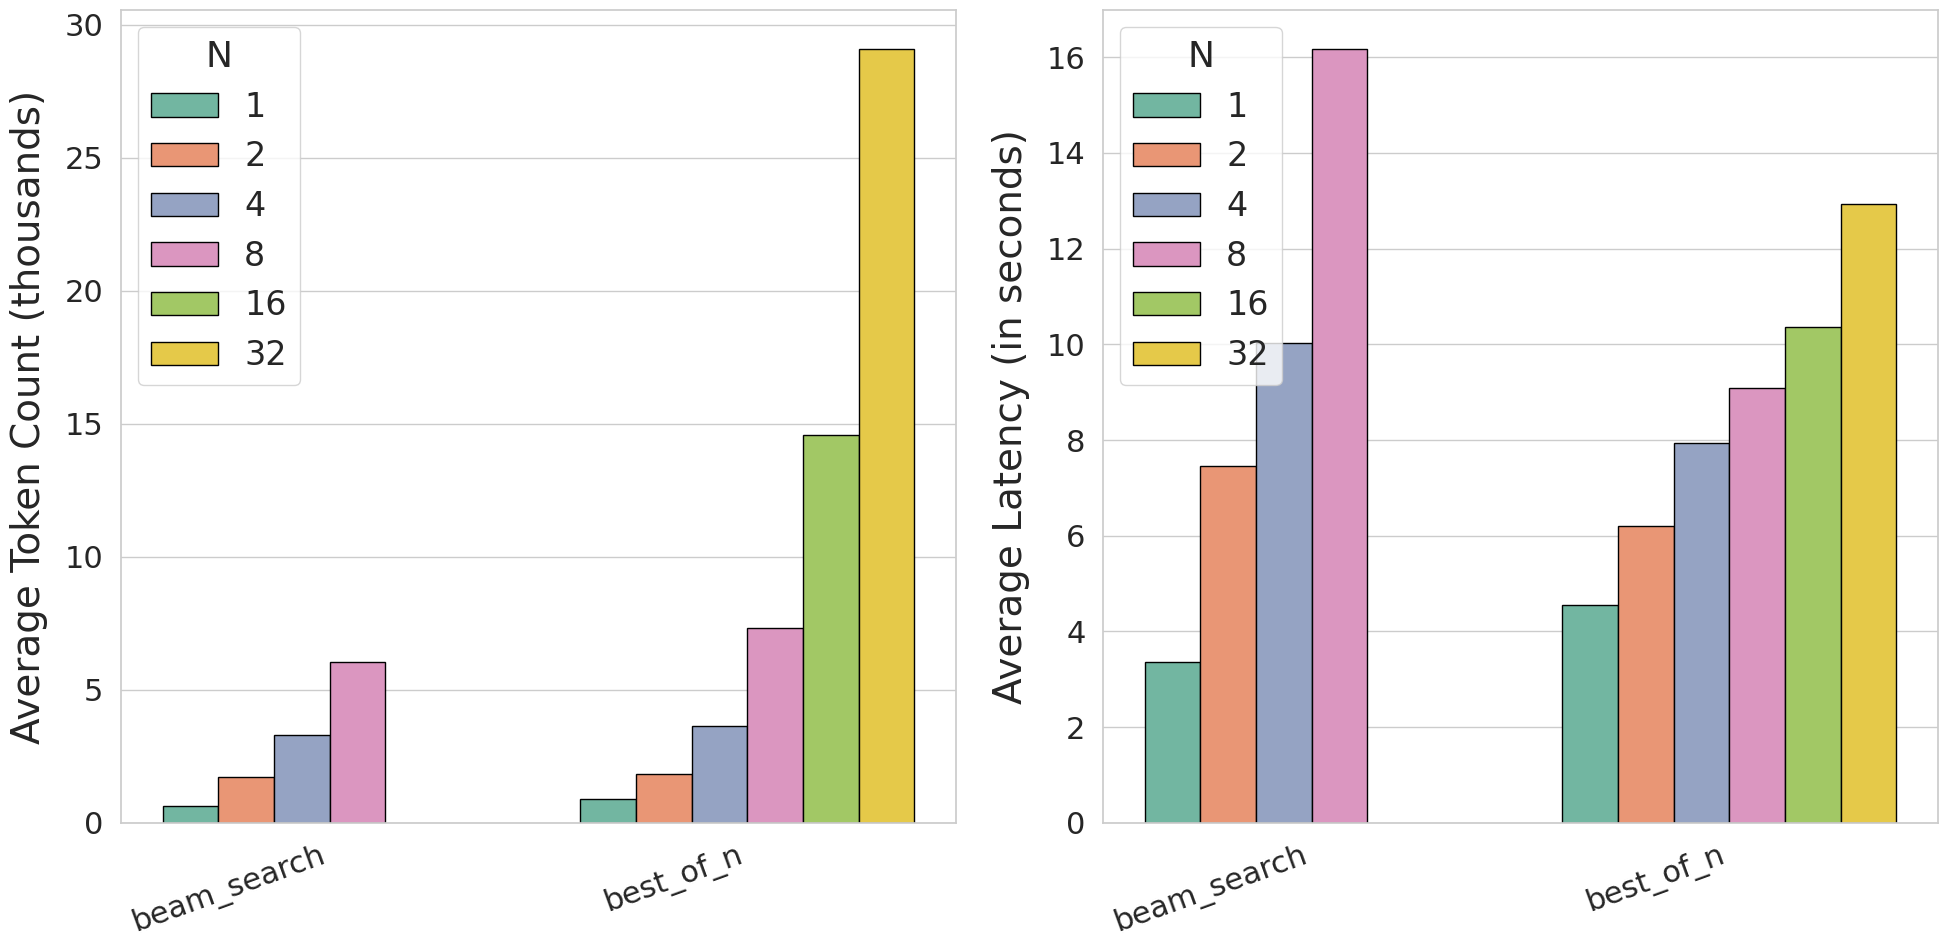

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

# Set even larger font sizes for all elements
sns.set(style="whitegrid", font_scale=2.0)  # Increase font_scale for larger fonts

fig, axs = plt.subplots(1, 2, figsize=(20, 10))  # Larger figure for clarity

palette = sns.color_palette("Set2", n_colors=len(beam_bon_chat_responses_only["N"].unique()))

# token_count plot (in thousands)
df_token = beam_bon_chat_responses_only.groupby(["method", "N"])["token_count"].mean().reset_index()
df_token["token_count_k"] = df_token["token_count"] / 1000  # convert to thousands

# Convert N to int for legend (removes .0)
df_token["N_int"] = df_token["N"].astype(int)

sns.barplot(
    data=df_token,
    x="method",
    y="token_count_k",
    hue="N_int",
    ax=axs[0],
    palette=palette,
    edgecolor="black"
)
axs[0].set_ylabel("Average Token Count (thousands)", fontsize=28, labelpad=12)
axs[0].set_xlabel("", fontsize=28, labelpad=10)
# axs[0].set_title("Average token_count by Method and N", fontsize=30)
axs[0].legend(title="N", loc="upper left", frameon=True, fontsize=24, title_fontsize=26)

# Remove decimals from y-axis tick labels for token count
axs[0].yaxis.set_major_formatter(FuncFormatter(lambda x, pos: f"{int(x)}"))

# time plot
df_time = beam_bon_chat_responses_only.groupby(["method", "N"])["time"].mean().reset_index()
df_time["N_int"] = df_time["N"].astype(int)

sns.barplot(
    data=df_time,
    x="method",
    y="time",
    hue="N_int",
    ax=axs[1],
    palette=palette,
    edgecolor="black"
)
axs[1].set_ylabel("Average Latency (in seconds)", fontsize=28, labelpad=12)
axs[1].set_xlabel("", fontsize=28, labelpad=10)
# axs[1].set_title("Average time by Method and N", fontsize=30)
axs[1].legend(title="N", loc="upper left", frameon=True, fontsize=24, title_fontsize=26)

# Remove decimals from y-axis tick labels for time plot
axs[1].yaxis.set_major_formatter(FuncFormatter(lambda x, pos: f"{int(x)}"))

for ax in axs:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=20, ha="right", fontsize=22)
    ax.tick_params(axis='both', which='major', labelsize=22, width=2.5, length=9)
    ax.tick_params(axis='both', which='minor', labelsize=20, width=2, length=6)
    # Remove set_yticklabels to avoid UserWarning

plt.tight_layout()
plt.show()

# Probe Training

In [89]:
# create a train test split, and keep track of indices.
from sklearn.model_selection import train_test_split

# create train/test split based on unique prompts.
unique_prompts = beam_bon_chat_responses_only['prompt'].unique()

# Split sb_idx into train/test
sb_idx_train, sb_idx_test = train_test_split(
    unique_prompts,
    test_size=0.20, # .20
    random_state=1 # 6
)

# Divide queries into train and test sets.
df_train = beam_bon_chat_responses_only[beam_bon_chat_responses_only['prompt'].isin(sb_idx_train)].reset_index(drop=True)
df_test = beam_bon_chat_responses_only[beam_bon_chat_responses_only['prompt'].isin(sb_idx_test)].reset_index(drop=True)

In [94]:
df_train_renamed = df_train.rename(columns={"prompt": "question", "eval_rm": "sl"})
df_train_renamed.head() # columns now match the names in df_train_math.

df_test_renamed = df_test.rename(columns={"prompt": "question", "eval_rm": "sl"})
df_test_renamed.head() # columns now match the names in df_test_math.

,question,completions,best_completion,scores,token_count,time,sl,N,beam_width,max_iteration,method,method_beam,method_bon
0,"[""What's the best first move in tic-tac-toe?"",...",[The best first move in tic-tac-toe depends on...,The best first move in tic-tac-toe depends on ...,"[[0.933034718, 0.933034718]]",184,0.889693,0.996074,1,2,5,beam_search,1,0
1,"[""What is \""The Bloody Lip Bar and Grill\""?""]","[Unfortunately, I'm unable to provide details ...","Unfortunately, I'm unable to provide details a...","[[0.8751049042, 0.8751049042]]",129,0.712318,0.999989,1,2,5,beam_search,1,0
2,"[""could you tell a funny and whimsical story a...","[Sure, I can craft a fun and whimsical story f...","Sure, I can craft a fun and whimsical story fo...","[[0.5337949395, 0.5337949395]]",781,2.719791,0.997572,1,2,5,beam_search,1,0
3,"[""I have frozen cod filets, tomatoes, lemons, ...",[Certainly! Here are some dinner ideas that yo...,Certainly! Here are some dinner ideas that you...,"[[0.6255370975, 0.6255370975]]",145,0.839499,0.811104,1,2,5,beam_search,1,0
4,"[""The following is a command that the user is ...",[YES],YES,"[[0.8367722034, 0.8367722034]]",6,0.212820,0.964629,1,2,5,beam_search,1,0


In [23]:
# df_train_renamed.to_csv("/dccstor/gma2/mehuldamani/search-and-learn/chat-training/chat_train_df.csv", index=False)
# df_test_renamed.to_csv("/dccstor/gma2/mehuldamani/search-and-learn/chat-training/chat_test_df.csv", index=False)

# read the csv files.
# df_train = pd.read_csv("/dccstor/gma2/mehuldamani/search-and-learn/chat-training/chat_train_df.csv")
df_test = pd.read_csv("/dccstor/gma2/mehuldamani/search-and-learn/chat-training/chat_test_df.csv")

In [8]:
df_train.shape, df_test.shape # ((121679, 11), (30279, 11))

((121679, 13), (30279, 13))

In [ ]:
df_train_math = pd.read_csv("/dccstor/gma2/mehuldamani/search-and-learn/aug24/bon_beam_train_df.csv")
df_test_math = pd.read_csv("/dccstor/gma2/mehuldamani/search-and-learn/aug24/bon_beam_test_df.csv")

df_train_math.shape, df_test_math.shape # ((87785, 13), (22206, 13))

((87785, 13), (22206, 13))

In [87]:
df_test_math.head()

,question,method,N,beam_width,max_iteration,sl,token_count,time,sb_idx,method_beam_search,method_maj,method_naive,method_weighted
0,"Given that $b$ is a multiple of $2373$, find t...",beam_search,2.0,2.0,40.0,0.0,928,3.41,3679,True,False,False,False
1,"In triangle $ABC$, $CA = CB$, and $D$ is the m...",beam_search,2.0,2.0,40.0,0.0,1441,4.93,5998,True,False,False,False
2,"At its Grand Opening, the Guthrie Market distr...",beam_search,2.0,2.0,40.0,1.0,861,3.37,1426,True,False,False,False
3,"Let \( p = 2^{3009}, q = 3^{2006}, \) and \( r...",beam_search,2.0,2.0,40.0,1.0,1387,5.09,6860,True,False,False,False
4,"Given the function $f(x)=x\ln x$, if $0 \lt x_...",beam_search,2.0,2.0,40.0,0.0,2371,8.12,4236,True,False,False,False


In [100]:
df_train.head()

,question,completions,best_completion,scores,token_count,time,sl,N,beam_width,max_iteration,method,method_beam,method_bon
0,"[""Is it morally right to try to have a certain...","[""As an AI language model, I don't have person...","As an AI language model, I don't have personal...","[[0.9482337832000001, 0.9177005291, 0.91770052...",360,1.808615,0.782239,1,2,5,beam_search,1,0
1,"[""\""Bacteria is life on Mars but a heartbeat i...",['This quote is from the science fiction novel...,"This quote is from the science fiction novel ""...","[[0.5812818408, 0.5203660131, 0.5203660131]]",208,1.205374,0.889310,1,2,5,beam_search,1,0
2,"[""translate to russian the followig sentence ...","['Российский перевод предложения: ""Суд Департа...","Российский перевод предложения: ""Суд Департаме...","[[0.5044392347000001, 0.5044392347000001]]",136,0.615303,0.994200,1,2,5,beam_search,1,0
3,"[""From now, you *always* have to talk as if yo...","[""I'm sorry, but I can't provide that kind of ...","I'm sorry, but I can't provide that kind of co...","[[0.7127805948, 0.7127805948]]",126,0.605112,0.999967,1,2,5,beam_search,1,0
4,"[""Can you create a caption using this, thanks?...","['""Gus has noticed some Molly Fish feeling unc...","""Gus has noticed some Molly Fish feeling uncom...","[[0.9103716612, 0.9103716612]]",95,0.541408,0.965549,1,2,5,beam_search,1,0


create features.

In [2]:
import numpy as np

x_path = "/dccstor/gma2/mehuldamani/search-and-learn/chat-training/test-features/X.npy"
x = np.load(x_path)
print(x.shape)


(30279, 1542)


In [3]:
# load in completed predicted probabilities.
ys = np.load("/dccstor/gma2/mehuldamani/search-and-learn/chat-training/test-features/y.npy")
calibrated_probs = np.load("/dccstor/gma2/mehuldamani/search-and-learn/chat-training/model/calibrated_probs.npy")

print(calibrated_probs.shape, calibrated_probs.min().item(), calibrated_probs.max().item())
print(ys.shape, ys.min().item(), ys.max().item())

ys.shape, calibrated_probs.shape

(30279,) 0.0550864115357399 0.9970756769180298
(30279,) 4.46e-08 1.0


((30279,), (30279,))

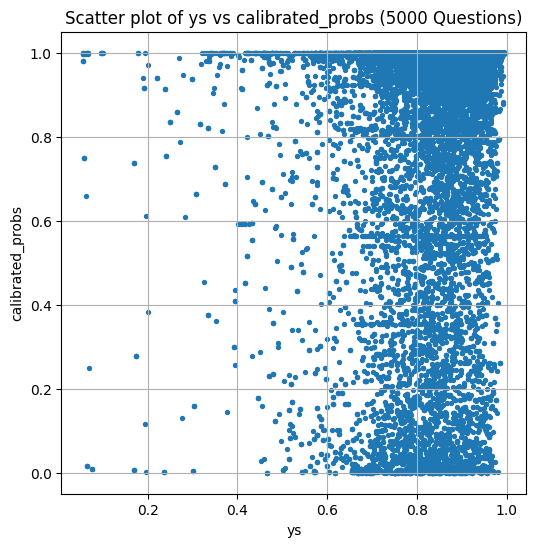

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
plt.scatter(calibrated_probs, ys, alpha=1, s=8)
plt.xlabel("ys")
plt.ylabel("calibrated_probs")
plt.title("Scatter plot of ys vs calibrated_probs (5000 Questions)")
plt.grid(True)
plt.show()

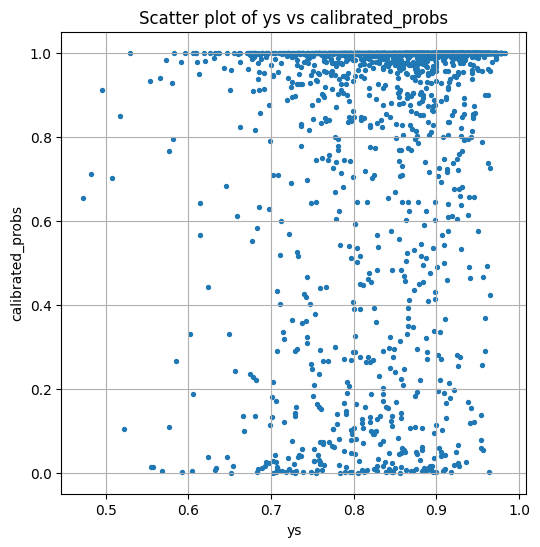

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
plt.scatter(calibrated_probs, ys, alpha=1, s=8)
plt.xlabel("ys")
plt.ylabel("calibrated_probs")
plt.title("Scatter plot of ys vs calibrated_probs")
plt.grid(True)
plt.show()

In [27]:
df_test['calibrated_probs'] = calibrated_probs

In [10]:
df_test.head()

,question,completions,best_completion,scores,token_count,time,sl,N,beam_width,max_iteration,method,method_beam,method_bon,calibrated_probs
0,"[""What's the best first move in tic-tac-toe?"",...","[""The best first move in tic-tac-toe depends o...",The best first move in tic-tac-toe depends on ...,"[[0.933034718, 0.933034718]]",184,0.889693,0.996074,1,2,5,beam_search,1,0,0.758476
1,"[""What is \""The Bloody Lip Bar and Grill\""?""]","['Unfortunately, I\'m unable to provide detail...","Unfortunately, I'm unable to provide details a...","[[0.8751049042, 0.8751049042]]",129,0.712318,0.999989,1,2,5,beam_search,1,0,0.849906
2,"[""could you tell a funny and whimsical story a...","['Sure, I can craft a fun and whimsical story ...","Sure, I can craft a fun and whimsical story fo...","[[0.5337949395, 0.5337949395]]",781,2.719791,0.997572,1,2,5,beam_search,1,0,0.849995
3,"[""I have frozen cod filets, tomatoes, lemons, ...",['Certainly! Here are some dinner ideas that y...,Certainly! Here are some dinner ideas that you...,"[[0.6255370975, 0.6255370975]]",145,0.839499,0.811104,1,2,5,beam_search,1,0,0.791382
4,"[""The following is a command that the user is ...",['YES'],YES,"[[0.8367722034, 0.8367722034]]",6,0.212820,0.964629,1,2,5,beam_search,1,0,0.780365


bin
(0.0333, 0.0667]      23
(0.0667, 0.1]         11
(0.1, 0.133]           1
(0.167, 0.2]          20
(0.2, 0.233]           5
(0.233, 0.267]        15
(0.267, 0.3]           8
(0.3, 0.333]          18
(0.333, 0.367]        34
(0.367, 0.4]          29
(0.4, 0.433]          45
(0.433, 0.467]        56
(0.467, 0.5]          86
(0.5, 0.533]          77
(0.533, 0.567]        86
(0.567, 0.6]         191
(0.6, 0.633]         234
(0.633, 0.667]       317
(0.667, 0.7]         508
(0.7, 0.733]         873
(0.733, 0.767]      1263
(0.767, 0.8]        1758
(0.8, 0.833]        2551
(0.833, 0.867]      3561
(0.867, 0.9]        4217
(0.9, 0.933]        5498
(0.933, 0.967]      5716
(0.967, 1.0]        3078
Name: count, dtype: int64


/tmp/ipykernel_3441300/3887312725.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  calibration = df_test.groupby("bin").agg(


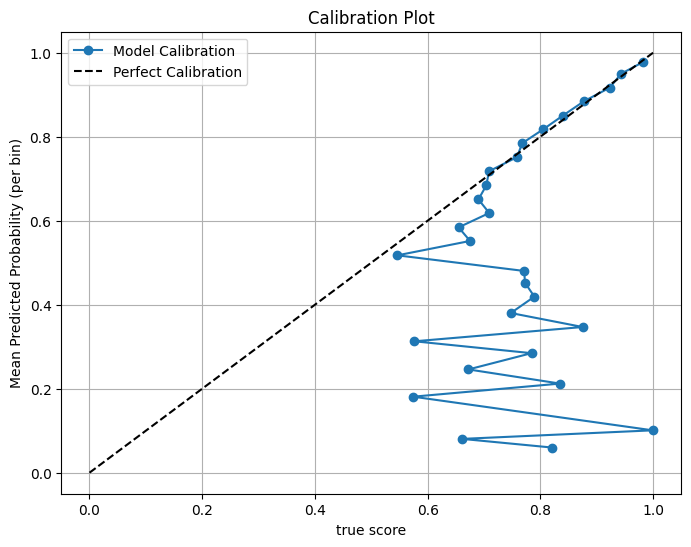

In [15]:
# plot a calibration plot.
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Define bin edges and assign each predicted_prob to a bin
num_bins = 30
df_test["bin"] = pd.cut(calibrated_probs, bins=np.linspace(0, 1, num_bins + 1), include_lowest=True)

# Group by bins and compute average predicted prob and accuracy
calibration = df_test.groupby("bin").agg(
    avg_pred_prob=("calibrated_probs", "mean"),
    accuracy=("sl", "mean"),
    count=("sl", "count")
).dropna()

# Print the number of points in each bin
print(calibration["count"])

# Plot calibration curve with flipped axes
plt.figure(figsize=(8, 6))
plt.plot(calibration["accuracy"], calibration["avg_pred_prob"], marker='o', label="Model Calibration")
plt.plot([0, 1], [0, 1], 'k--', label="Perfect Calibration")
plt.xlabel("true score")
plt.ylabel("Mean Predicted Probability (per bin)")
plt.title("Calibration Plot")
plt.grid(True)
plt.legend()
plt.show()

# Routing Results.

In [24]:
# Create new columns for predicted token count and time based on group means
group_means = df_train.groupby(["method", "N", "beam_width", "max_iteration"])[["token_count", "time"]].mean().reset_index()
group_means = group_means.rename(columns={"token_count": "token_count_pred", "time": "time_pred"})

# Merge these means back into df_test
df_test = df_test.merge(group_means, on=["method", "N", "beam_width", "max_iteration"], how="left")

In [25]:
df_test.head()

,question,completions,best_completion,scores,token_count,time,sl,N,beam_width,max_iteration,method,method_beam,method_bon,token_count_pred,time_pred
0,"[""What's the best first move in tic-tac-toe?"",...","[""The best first move in tic-tac-toe depends o...",The best first move in tic-tac-toe depends on ...,"[[0.933034718, 0.933034718]]",184,0.889693,0.996074,1,2,5,beam_search,1,0,276.202228,1.518778
1,"[""What is \""The Bloody Lip Bar and Grill\""?""]","['Unfortunately, I\'m unable to provide detail...","Unfortunately, I'm unable to provide details a...","[[0.8751049042, 0.8751049042]]",129,0.712318,0.999989,1,2,5,beam_search,1,0,276.202228,1.518778
2,"[""could you tell a funny and whimsical story a...","['Sure, I can craft a fun and whimsical story ...","Sure, I can craft a fun and whimsical story fo...","[[0.5337949395, 0.5337949395]]",781,2.719791,0.997572,1,2,5,beam_search,1,0,276.202228,1.518778
3,"[""I have frozen cod filets, tomatoes, lemons, ...",['Certainly! Here are some dinner ideas that y...,Certainly! Here are some dinner ideas that you...,"[[0.6255370975, 0.6255370975]]",145,0.839499,0.811104,1,2,5,beam_search,1,0,276.202228,1.518778
4,"[""The following is a command that the user is ...",['YES'],YES,"[[0.8367722034, 0.8367722034]]",6,0.212820,0.964629,1,2,5,beam_search,1,0,276.202228,1.518778


In [66]:
# get the average accuracy and token_count for each configuration.
config_summary_df = df_test.groupby(["N", "beam_width", "max_iteration", "method"])[
    ["token_count", "time", "sl", "calibrated_probs", "token_count_pred", "time_pred"]
].mean().reset_index()

In [67]:
config_summary_df.head()

,N,beam_width,max_iteration,method,token_count,time,sl,calibrated_probs,token_count_pred,time_pred
0,1,1,1,best_of_n,912.204332,4.580707,0.761374,0.836080,912.176371,4.577281
1,1,2,5,beam_search,247.279863,1.401507,0.841230,0.840020,276.202228,1.518778
2,1,2,10,beam_search,377.837531,2.437027,0.889918,0.859509,400.449083,2.460210
3,1,2,40,beam_search,572.316683,4.651563,0.888352,0.912033,597.026098,4.523370
4,1,4,5,beam_search,519.991497,1.785357,0.824159,0.845085,510.235931,1.676196


In [ ]:
df_test['question'].nunique() # 983 unique questions in the test set.

983

In [36]:
# route for a given lambda.
def compute_max_utility_pred(df, lambda_, method="oracle", cost="token_count"):
    def get_max_utility(group):
        group = group.copy()
        if method == "oracle":
            group["utility"] = group["sl"] - lambda_ * group[cost]
        elif method == "adaptive_router":
            group["utility"] = group["calibrated_probs"] - lambda_ * group[cost]
        else:
            raise ValueError(f"Invalid method: {method}")
        idx_max = group["utility"].idxmax()

        return pd.Series({
            "max_utility": group.loc[idx_max, "utility"],
            "max_predicted_prob": group.loc[idx_max, "calibrated_probs"],
            "max_eval_rm": group.loc[idx_max, "sl"],
            "max_cost": group.loc[idx_max, "token_count"],
            "max_time": group.loc[idx_max, "time"],
            "N": group.loc[idx_max, "N"]
        })

    result_df = df.groupby("question").apply(get_max_utility).reset_index()
    return result_df

In [37]:
# route for a list of lambdas.
def get_router_df(input_df, lambda_list, method="oracle", cost="token_count"):
    results = []

    for lambda_value in lambda_list:
        adaptive_router = compute_max_utility_pred(input_df, lambda_value, method, cost)
        average_accuracy = adaptive_router["max_eval_rm"].mean() # accuracy as a percentage of questions (out of all questions in the test set) answered correctly.
        average_cost = adaptive_router["max_cost"].mean() # average over all questions in test set for adaptive router.
        average_time = adaptive_router["max_time"].mean()
        average_predicted_prob = adaptive_router["max_predicted_prob"].mean()
        
        results.append({
            "lambda": lambda_value,
            "eval_rm": average_accuracy,
            "predicted_prob": average_predicted_prob,
            "token_count": average_cost,
            "time": average_time,
        })

    # Convert to DataFrame
    output_df = pd.DataFrame(results)
    output_df["method"] = method

    return output_df

In [38]:
oracle_tc = get_router_df(df_test, lambda_list=np.logspace(-7, -1, num=50), method="oracle", cost="token_count")
adaptive_tc = get_router_df(df_test, lambda_list=np.logspace(-7, -1, num=50), method="adaptive_router", cost="token_count_pred")
adaptive_oracle_tc = get_router_df(df_test, lambda_list=np.logspace(-7, -1, num=50), method="adaptive_router", cost="token_count")

adaptive_oracle_lat = get_router_df(df_test, lambda_list=np.logspace(-5, -1, num=50), method="adaptive_router", cost="time")
adaptive_lat = get_router_df(df_test, lambda_list=np.logspace(-5, -1, num=50), method="adaptive_router", cost="time_pred")
oracle_lat = get_router_df(df_test, lambda_list=np.logspace(-5, -1, num=50), method="oracle", cost="time")

/tmp/ipykernel_3441300/4198195803.py:22: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result_df = df.groupby("question").apply(get_max_utility).reset_index()
/tmp/ipykernel_3441300/4198195803.py:22: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result_df = df.groupby("question").apply(get_max_utility).reset_index()
/tmp/ipykernel_3441300/4198195803.py:22: FutureWarning: DataFrameGroupBy.apply operated on the groupin

In [39]:
adaptive_tc.head()

,lambda,eval_rm,predicted_prob,token_count,time,method
0,1.000000e-07,0.942293,0.926973,8768.110885,18.724795,adaptive_router
1,1.325711e-07,0.940799,0.926955,8616.383520,18.511893,adaptive_router
2,1.757511e-07,0.940881,0.926916,8344.158698,18.326207,adaptive_router
3,2.329952e-07,0.939839,0.926814,7919.107833,17.951516,adaptive_router
4,3.088844e-07,0.941111,0.926683,7392.408952,17.051962,adaptive_router


In [40]:
adaptive_lat.head()

,lambda,eval_rm,predicted_prob,token_count,time,method
0,0.000010,0.940417,0.927010,9497.906409,18.651558,adaptive_router
1,0.000012,0.940417,0.927010,9497.906409,18.651558,adaptive_router
2,0.000015,0.940417,0.927010,9497.906409,18.651558,adaptive_router
3,0.000018,0.940442,0.927009,9494.729400,18.580789,adaptive_router
4,0.000021,0.940442,0.927009,9494.729400,18.580789,adaptive_router


In [41]:
oracle_tc.head()

,lambda,eval_rm,predicted_prob,token_count,time,method
0,1.000000e-07,0.999379,0.877629,1071.099695,4.542960,oracle
1,1.325711e-07,0.999375,0.877569,1035.726348,4.419835,oracle
2,1.757511e-07,0.999370,0.877348,1001.314344,4.357885,oracle
3,2.329952e-07,0.999360,0.877411,950.694812,4.213988,oracle
4,3.088844e-07,0.999348,0.877252,907.912513,4.071927,oracle


In [42]:
oracle_lat.head()

,lambda,eval_rm,predicted_prob,token_count,time,method
0,0.000010,0.999401,0.874497,2285.864700,4.359619,oracle
1,0.000012,0.999400,0.874433,2194.602238,4.208181,oracle
2,0.000015,0.999399,0.873876,2092.380468,4.133388,oracle
3,0.000018,0.999398,0.874032,2067.786368,4.089416,oracle
4,0.000021,0.999396,0.873907,2032.037640,3.994849,oracle


Fill in "-1"'s for the configuration-related columns for the router + oracle.

In [43]:
adaptive_oracle_tc['N'] = -1
adaptive_oracle_lat['N'] = -1
adaptive_tc['N'] = -1
adaptive_lat['N'] = -1
oracle_tc['N'] = -1
oracle_lat['N'] = -1

In [72]:
config_summary_df.rename(columns={"calibrated_probs": "predicted_prob"}, inplace=True)
config_summary_df.rename(columns={"sl": "eval_rm"}, inplace=True)


In [73]:
adaptive_oracle_tc['method'] = 'oracle_cost'
adaptive_oracle_lat['method'] = 'oracle_cost'

In [74]:
config_summary_df.head()

,N,beam_width,max_iteration,method,token_count,time,eval_rm,predicted_prob,token_count_pred,time_pred
0,1,1,1,best_of_n,912.204332,4.580707,0.761374,0.836080,912.176371,4.577281
1,1,2,5,beam_search,247.279863,1.401507,0.841230,0.840020,276.202228,1.518778
2,1,2,10,beam_search,377.837531,2.437027,0.889918,0.859509,400.449083,2.460210
3,1,2,40,beam_search,572.316683,4.651563,0.888352,0.912033,597.026098,4.523370
4,1,4,5,beam_search,519.991497,1.785357,0.824159,0.845085,510.235931,1.676196


In [ ]:
# config_summary_df.rename(columns={"sl": "eval_rm"}, inplace=True)
# config_summary_df

In [75]:
# outer join on the shared columns
df_1_tc = pd.merge(
    adaptive_tc,
    config_summary_df,
    on=["eval_rm", "token_count", "time", "predicted_prob", "N", "method"],
    how="outer"
)
df_2_tc = pd.merge(
    df_1_tc,
    oracle_tc,
    on=["lambda", "eval_rm", "token_count", "time", "predicted_prob", "N", "method"],
    how="outer"
)
df_3_tc = pd.merge(
    df_2_tc,
    adaptive_oracle_tc,
    on=["lambda", "eval_rm", "token_count", "time", "predicted_prob", "N", "method"],
    how="outer"
)
# Replace NaN values with -1 for plotting purposes
query_optimal_tc = df_3_tc.fillna(-1)

In [76]:
query_optimal_tc['method'].unique()

array(['oracle_cost', 'adaptive_router', 'oracle', 'best_of_n',
       'beam_search'], dtype=object)

In [77]:
# outer join on the shared columns
df_1_lat = pd.merge(
    adaptive_lat,
    config_summary_df,
    on=["eval_rm", "token_count", "time", "predicted_prob", "N", "method"],
    how="outer"
)
df_2_lat = pd.merge(
    df_1_lat,
    oracle_lat,
    on=["lambda", "eval_rm", "token_count", "time", "predicted_prob", "N", "method"],
    how="outer"
)
df_3_lat = pd.merge(
    df_2_lat,
    adaptive_oracle_lat,
    on=["lambda", "eval_rm", "token_count", "time", "predicted_prob", "N", "method"],
    how="outer"
)
# Replace NaN values with -1 for plotting purposes
query_optimal_lat = df_3_lat.fillna(-1)

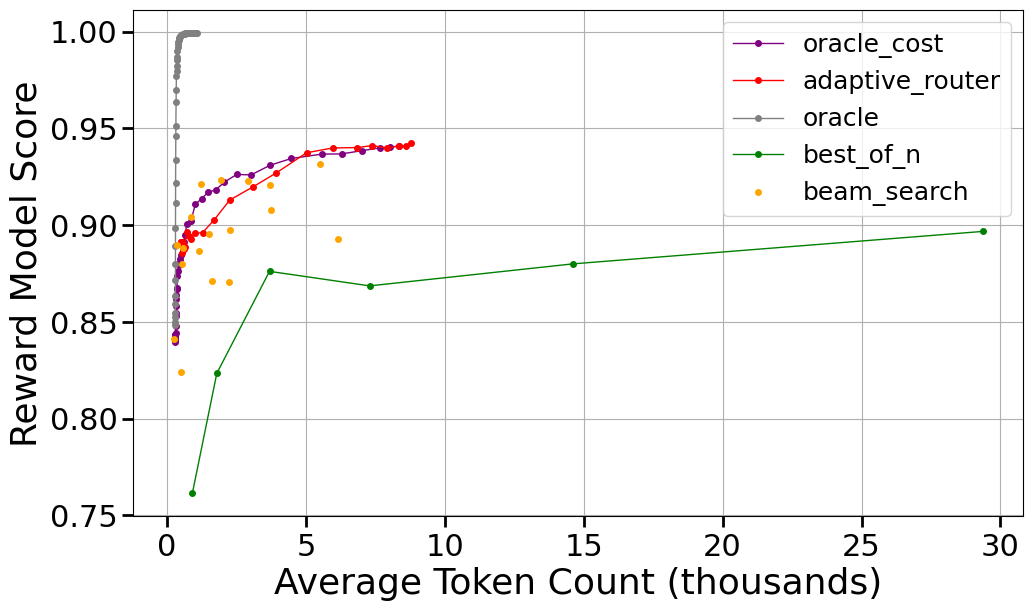

In [78]:
# router on token count.
method_colors = {
    "oracle_cost": "purple",  # Query-adaptive router with oracle cost
    "adaptive_router": "red",  # Query-adaptive router
    "oracle": "gray",  # Oracle router
    "best_of_n": "green",
    "beam_search": "orange",
}

plt.figure(figsize=(10, 6))

for method in query_optimal_tc["method"].unique():
    method_df = query_optimal_tc[query_optimal_tc["method"] == method].sort_values("token_count")
    color = method_colors.get(method, "adaptive")
    if method == "beam_search":
        plt.plot(
            method_df["token_count"] / 1000, 
            method_df["eval_rm"], 
            marker="o", 
            linestyle="None", 
            color=color, 
            label=method,
            markersize=4,
            linewidth=1
        )
    else:
        plt.plot(
            method_df["token_count"] / 1000, 
            method_df["eval_rm"], 
            marker="o", 
            linestyle="-", 
            color=color, 
            label=method,
            markersize=4,
            linewidth=1
        )

plt.xlabel("Average Token Count (thousands)", fontsize=26)
plt.ylabel("Reward Model Score", fontsize=26)
plt.legend(title="", fontsize=18)
plt.grid(True)
plt.tight_layout()
plt.tick_params(axis='both', which='major', length=8, width=2, labelsize=22)
plt.tick_params(axis='both', which='minor', length=5, width=1, labelsize=22)
plt.show()

In [ ]:
### look at oracle costs.

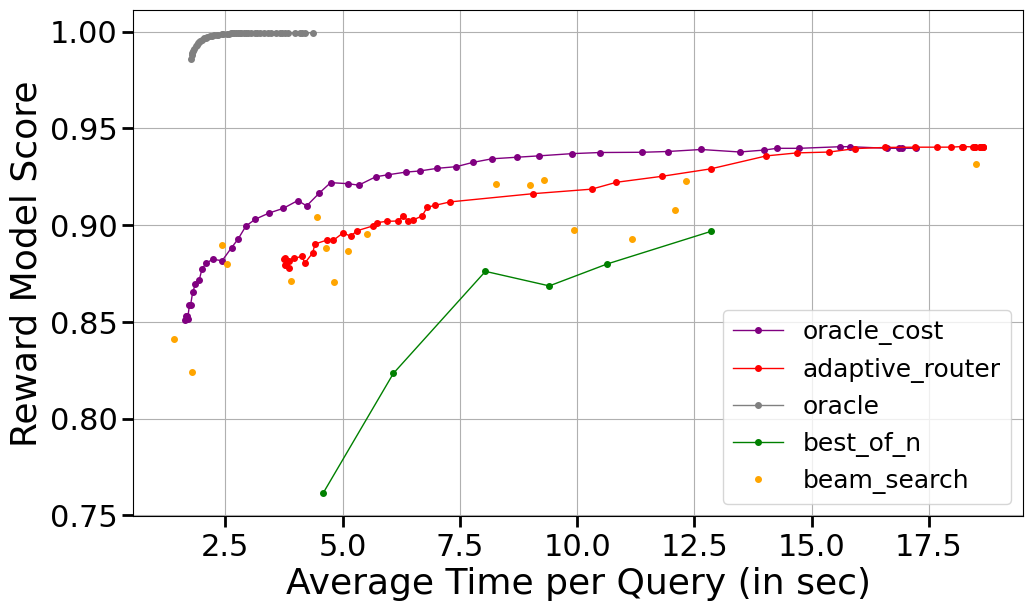

In [79]:
# router on token count.
method_colors = {
    "oracle_cost": "purple",  # Query-adaptive router with oracle cost
    "adaptive_router": "red",  # Query-adaptive router
    "oracle": "gray",  # Oracle router
    "best_of_n": "green",
    "beam_search": "orange",
}

plt.figure(figsize=(10, 6))

for method in query_optimal_lat["method"].unique():
    method_df = query_optimal_lat[query_optimal_lat["method"] == method].sort_values("time")
    color = method_colors.get(method, "adaptive")
    if method == "beam_search":
        plt.plot(
            method_df["time"], 
            method_df["eval_rm"], 
            marker="o", 
            linestyle="None", 
            color=color, 
            label=method,
            markersize=4,
            linewidth=1
        )
    else:
        plt.plot(
            method_df["time"], 
            method_df["eval_rm"], 
            marker="o", 
            linestyle="-", 
            color=color, 
            label=method,
            markersize=4,
            linewidth=1
        )

plt.xlabel("Average Time per Query (in sec)", fontsize=26)
plt.ylabel("Reward Model Score", fontsize=26)
plt.legend(title="", fontsize=18)
plt.grid(True)
plt.tight_layout()
plt.tick_params(axis='both', which='major', length=8, width=2, labelsize=22)
plt.tick_params(axis='both', which='minor', length=5, width=1, labelsize=22)
plt.show()

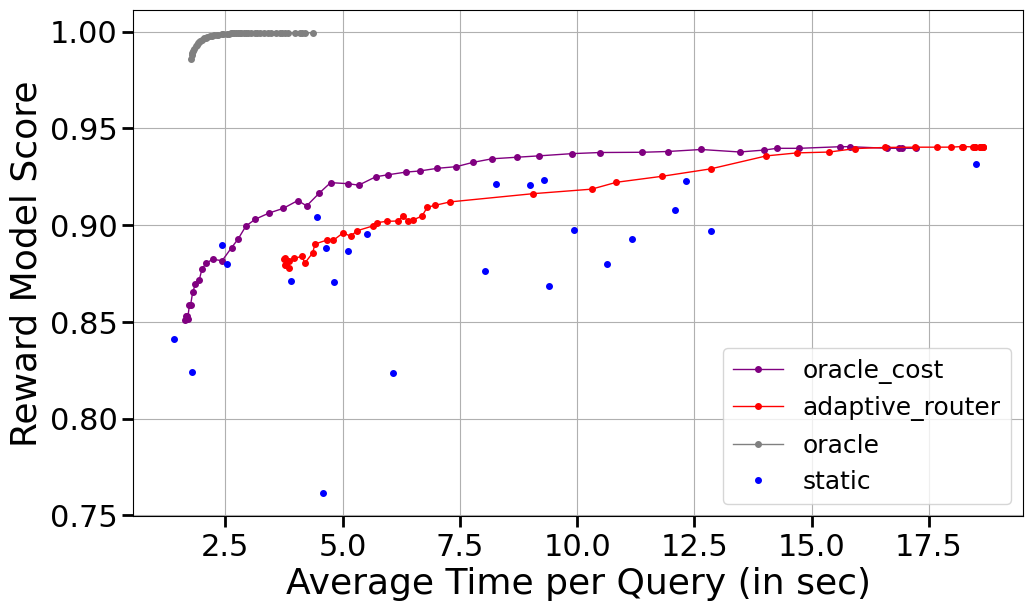

In [64]:
# router on token count.
method_colors = {
    "oracle_cost": "purple",  # Query-adaptive router with oracle cost
    "adaptive_router": "red",  # Query-adaptive router
    "oracle": "gray",  # Oracle router
    "static": "blue",
}

plt.figure(figsize=(10, 6))

for method in query_optimal_lat["method"].unique():
    method_df = query_optimal_lat[query_optimal_lat["method"] == method].sort_values("time")
    color = method_colors.get(method, "adaptive")
    if method == "static":
        plt.plot(
            method_df["time"], 
            method_df["eval_rm"], 
            marker="o", 
            linestyle="None", 
            color=color, 
            label=method,
            markersize=4,
            linewidth=1
        )
    else:
        plt.plot(
            method_df["time"], 
            method_df["eval_rm"], 
            marker="o", 
            linestyle="-", 
            color=color, 
            label=method,
            markersize=4,
            linewidth=1
        )

plt.xlabel("Average Time per Query (in sec)", fontsize=26)
plt.ylabel("Reward Model Score", fontsize=26)
plt.legend(title="", fontsize=18)
plt.grid(True)
plt.tight_layout()
plt.tick_params(axis='both', which='major', length=8, width=2, labelsize=22)
plt.tick_params(axis='both', which='minor', length=5, width=1, labelsize=22)
plt.show()